# CNN-RNN

In [1]:
import tensorflow.keras as keras

In [2]:
# Módulos necesarios. Asegurarse de poder importarlos.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from pylab import rcParams
from scipy import stats
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
import os as os
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from time import time
from tensorflow.keras.models import load_model

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

In [3]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
tf.__version__

/usr/bin/python
3.6.8 (default, Aug 20 2019, 17:12:48) 
[GCC 8.3.0]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


'1.14.0'

In [4]:
keras.__version__

'2.2.4-tf'

# 12-FOLD

In [5]:
subjects = ['01', '02', '03', '05', '08', '09', '10', '11', '13', '14', '16', '17']
global activities
activities = [9,10,11,12,13,19,20,21,24,25,31]

In [6]:
def perf_measure(cm1):
    temp = 0
    TruePositive = np.diag(cm1)
    FalsePositive = []
    for i in range(len(activities)):
        FalsePositive.append(sum(cm1[:,i]) - cm1[i,i])
    FalseNegative = []
    for i in range(len(activities)):
        FalseNegative.append(sum(cm1[i,:]) - cm1[i,i])
    TrueNegative = []
    for i in range(len(activities)):
        temp = np.delete(cm1, i, 0)   # delete ith row
        temp = np.delete(temp, i, 1)  # delete ith column
        TrueNegative.append(sum(sum(temp)))
    
    return(TruePositive, FalsePositive, TrueNegative, FalseNegative)

In [7]:
def plot_confusion_matrix(cm, subject_test, classes,
                          cmap=plt.cm.Blues):
    
    a_kws = {"size": 20}
    c_kws = {'shrink':0.8,
             'ticks':[0,2,4,6,8,10]}
    
    plt.figure(figsize=(20, 20))
    sns.heatmap(cm, xticklabels=classes, yticklabels=classes, square = True, robust = True, annot=True, cmap='YlOrBr', annot_kws=a_kws, cbar_kws=c_kws)
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=20)
    #plt.title('CONFUSION MATRIX', fontsize=30)
    plt.ylabel('TRUE ACTIVITY', fontsize=25, fontstyle='italic')
    plt.xlabel('PREDICTION', fontsize=25, fontstyle='italic')
    
    locs, labels = plt.xticks()
    plt.xticks(locs, labels, rotation='horizontal')
    locs, labels = plt.yticks()
    plt.yticks(locs, labels, rotation='horizontal')
    plt.tick_params(labelsize=20)

    # Guardamos la imagen en formato vectorial
    plt.draw()
    plt.savefig('./02BAUGFFT_SP_KFOLD_models/matriz_confusion_'+subject_test+'_RAWORIENTATION.svg', bbox_inches='tight',format='svg')
    plt.show()

In [8]:
# Ajustado a los datos
n_time_steps = 128
n_classes = 11 # Nº de clases (el 0 está eliminado)
n_channels = 1 # Nº de canales
n_columns = 40

# Podríamos variarlo
batch_size = 128 # Tamaño del batch
learning_rate = 1e-3 # Learning rate (por defecto es 0.001)
epochs = 100 # Épocas

##################################################################################################################################
#####################################################  K-FOLD 1  #################################################################
Test subject: 01
Test dataset: 
(98, 1, 128, 40) (98, 11)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.wh

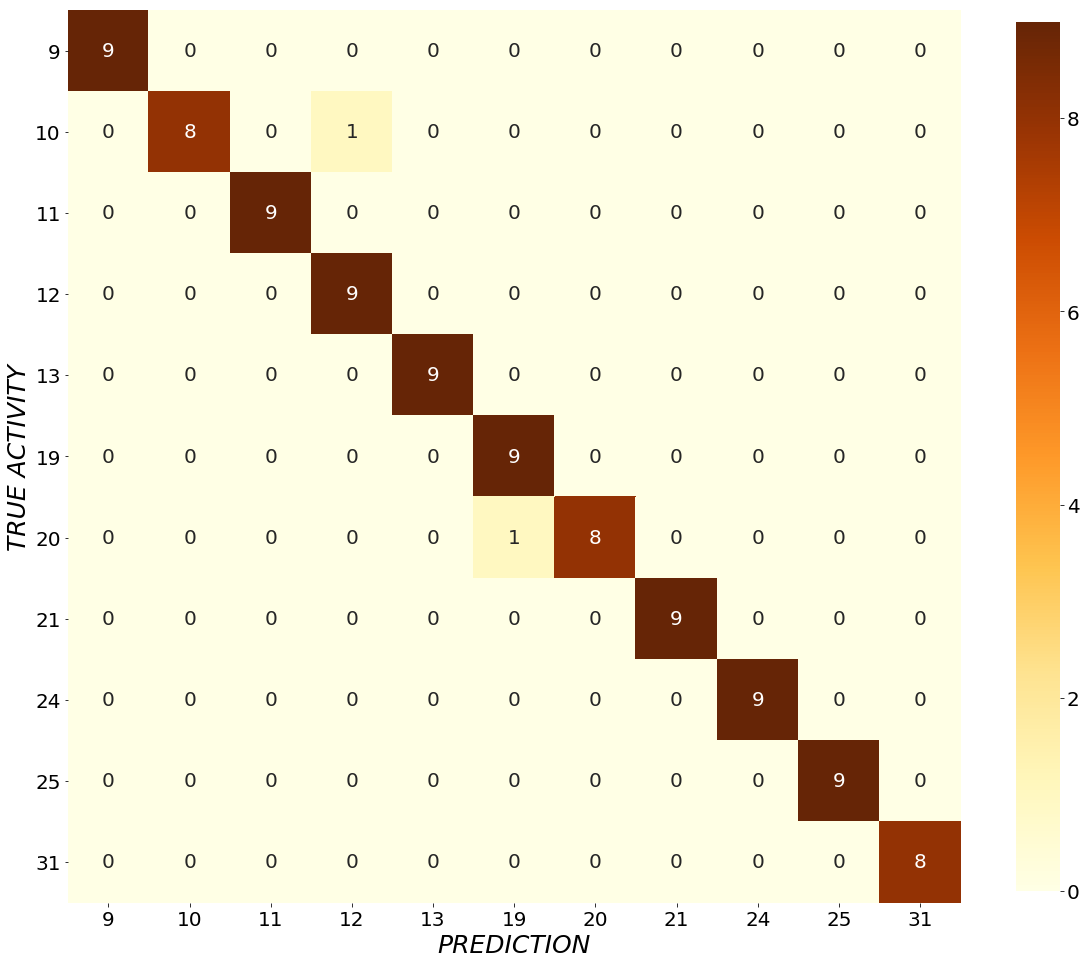



True Positive:  [9 8 9 9 9 9 8 9 9 9 8]
False Positive:  [0 0 0 1 0 1 0 0 0 0 0]
True Negative:  [89 89 89 88 89 88 89 89 89 89 90]
False Negative:  [0 1 0 0 0 0 1 0 0 0 0]


Total accuracy: 
0.9795918367346939


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     0.889     0.941         9
           2      1.000     1.000     1.000         9
           3      0.900     1.000     0.947         9
           4      1.000     1.000     1.000         9
           5      0.900     1.000     0.947         9
           6      1.000     0.889     0.941         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          0.980        98
   macro avg      0.982     0.980     0.980        98
weig

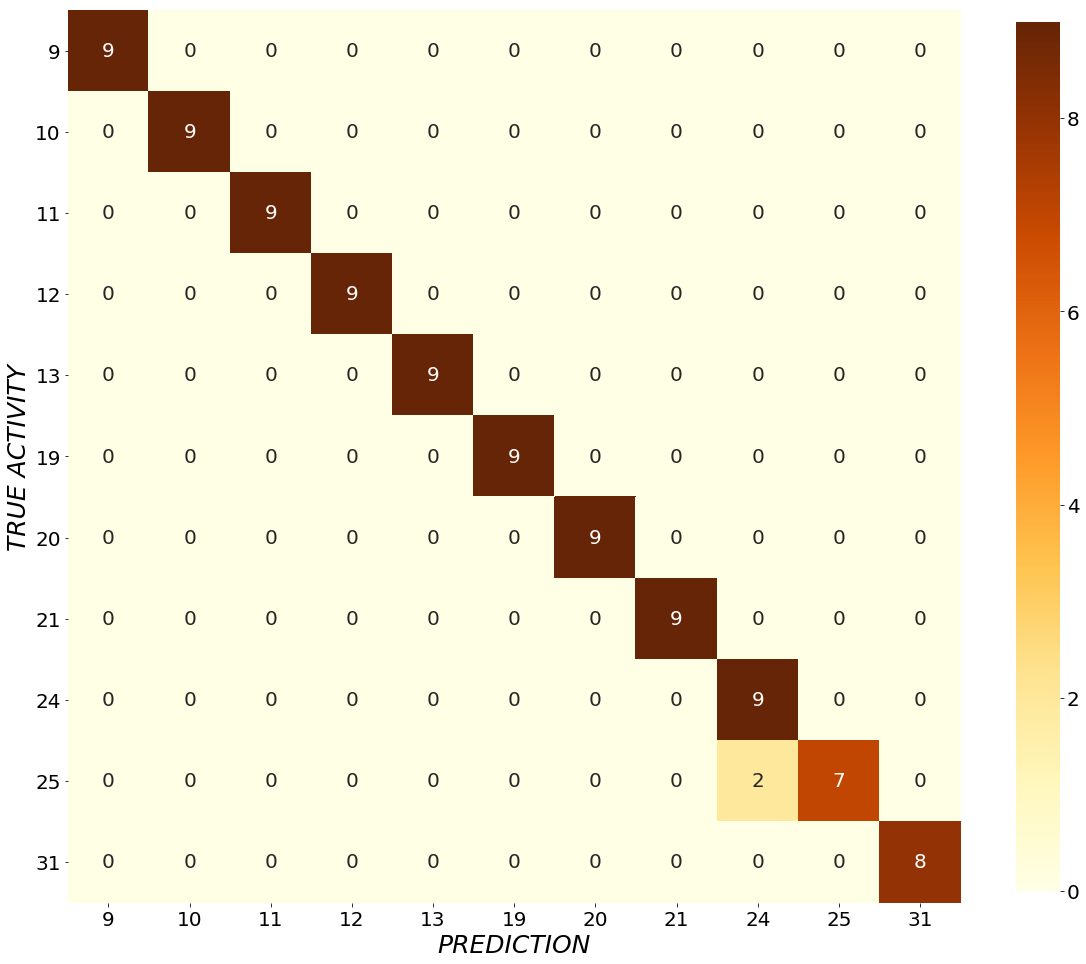



True Positive:  [9 9 9 9 9 9 9 9 9 7 8]
False Positive:  [0 0 0 0 0 0 0 0 2 0 0]
True Negative:  [89 89 89 89 89 89 89 89 87 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 2 0]


Total accuracy: 
0.9795918367346939


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      0.818     1.000     0.900         9
           9      1.000     0.778     0.875         9
          10      1.000     1.000     1.000         8

    accuracy                          0.980        98
   macro avg      0.983     0.980     0.980        98
weig

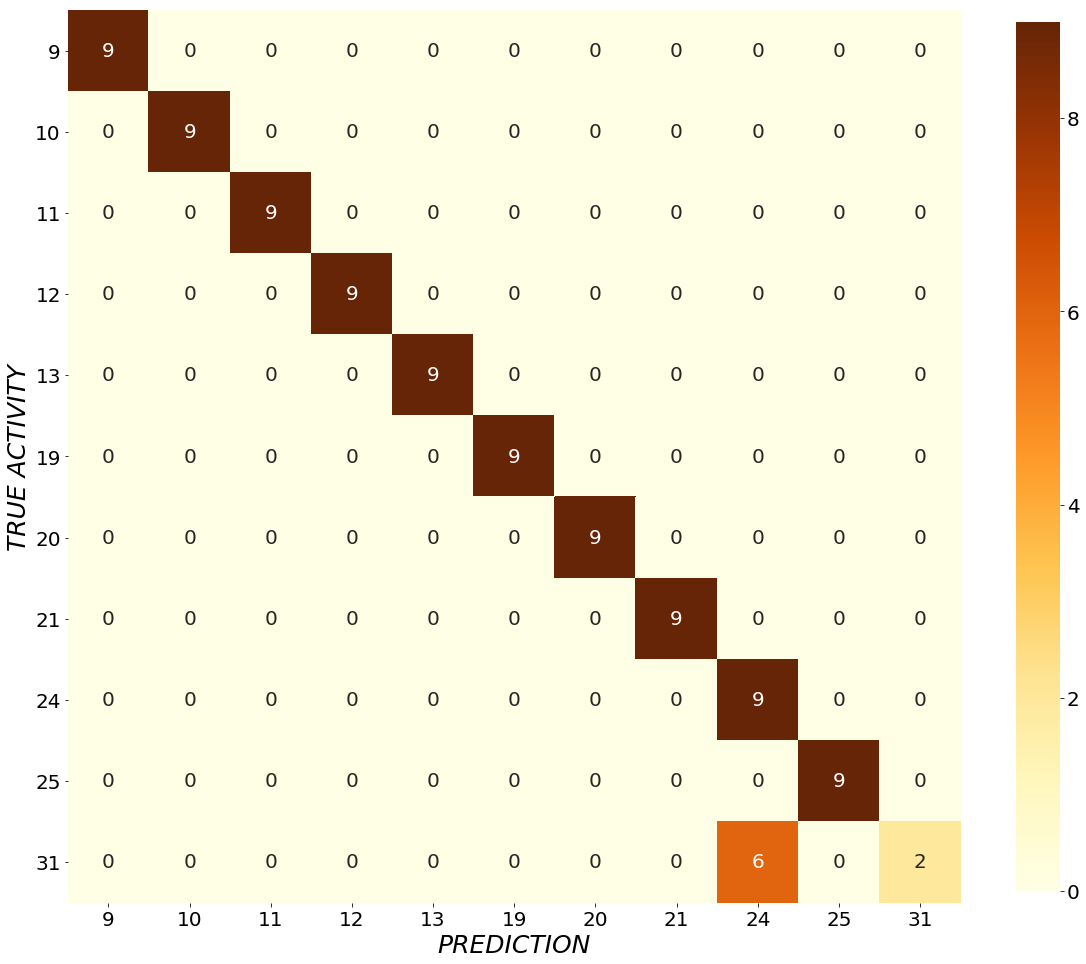



True Positive:  [9 9 9 9 9 9 9 9 9 9 2]
False Positive:  [0 0 0 0 0 0 0 0 6 0 0]
True Negative:  [89 89 89 89 89 89 89 89 83 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 0 6]


Total accuracy: 
0.9387755102040817


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      0.600     1.000     0.750         9
           9      1.000     1.000     1.000         9
          10      1.000     0.250     0.400         8

    accuracy                          0.939        98
   macro avg      0.964     0.932     0.923        98
weig

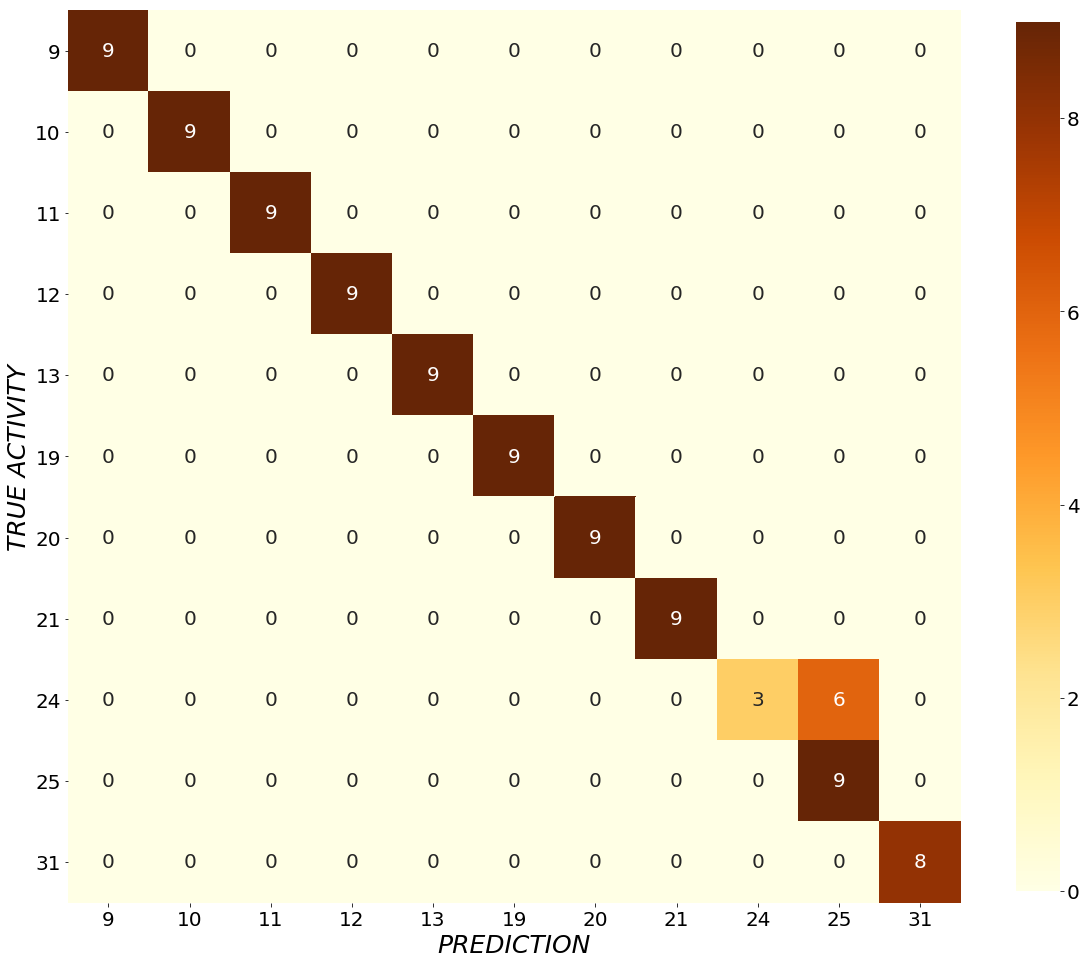



True Positive:  [9 9 9 9 9 9 9 9 3 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 6 0]
True Negative:  [89 89 89 89 89 89 89 89 89 83 90]
False Negative:  [0 0 0 0 0 0 0 0 6 0 0]


Total accuracy: 
0.9387755102040817


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     0.333     0.500         9
           9      0.600     1.000     0.750         9
          10      1.000     1.000     1.000         8

    accuracy                          0.939        98
   macro avg      0.964     0.939     0.932        98
weig

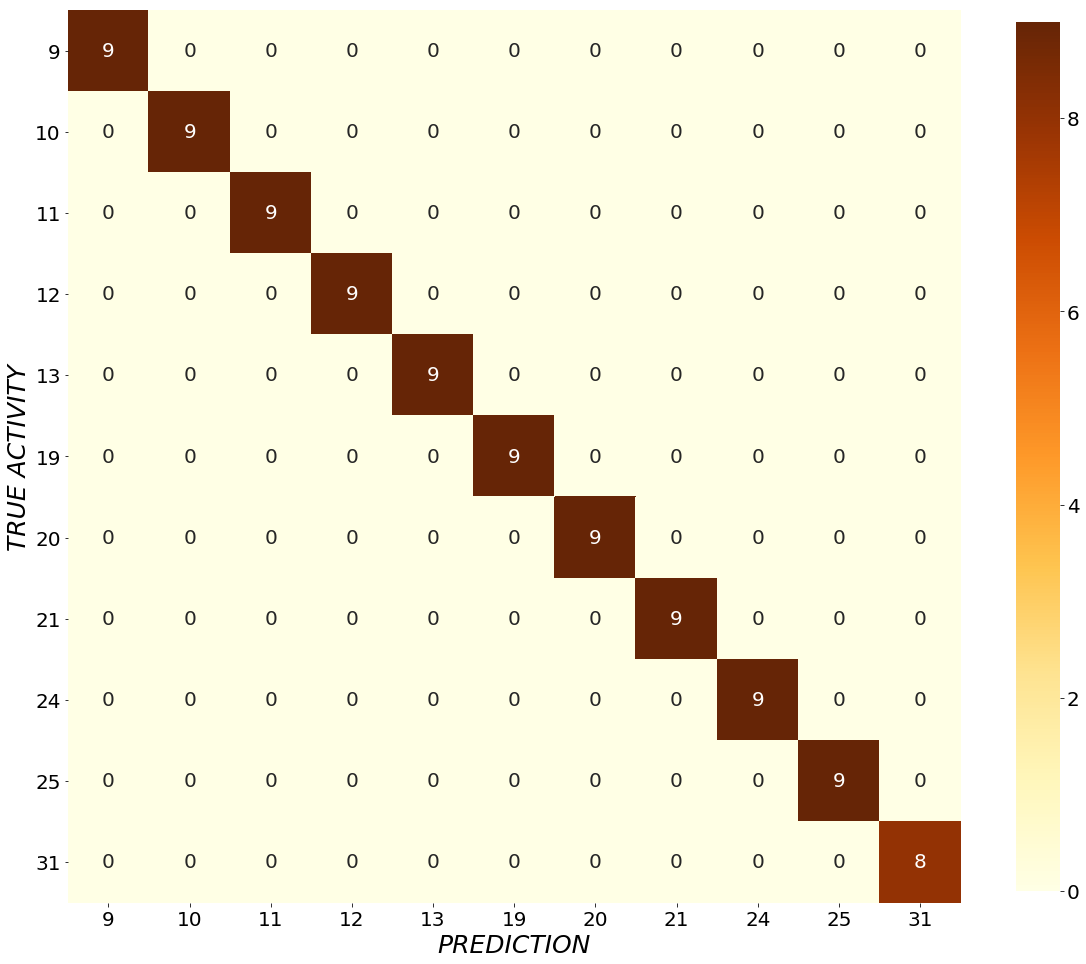



True Positive:  [9 9 9 9 9 9 9 9 9 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 0 0]
True Negative:  [89 89 89 89 89 89 89 89 89 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 0 0]


Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          1.000        98
   macro avg      1.000     1.000     1.000        98
weighted avg      1

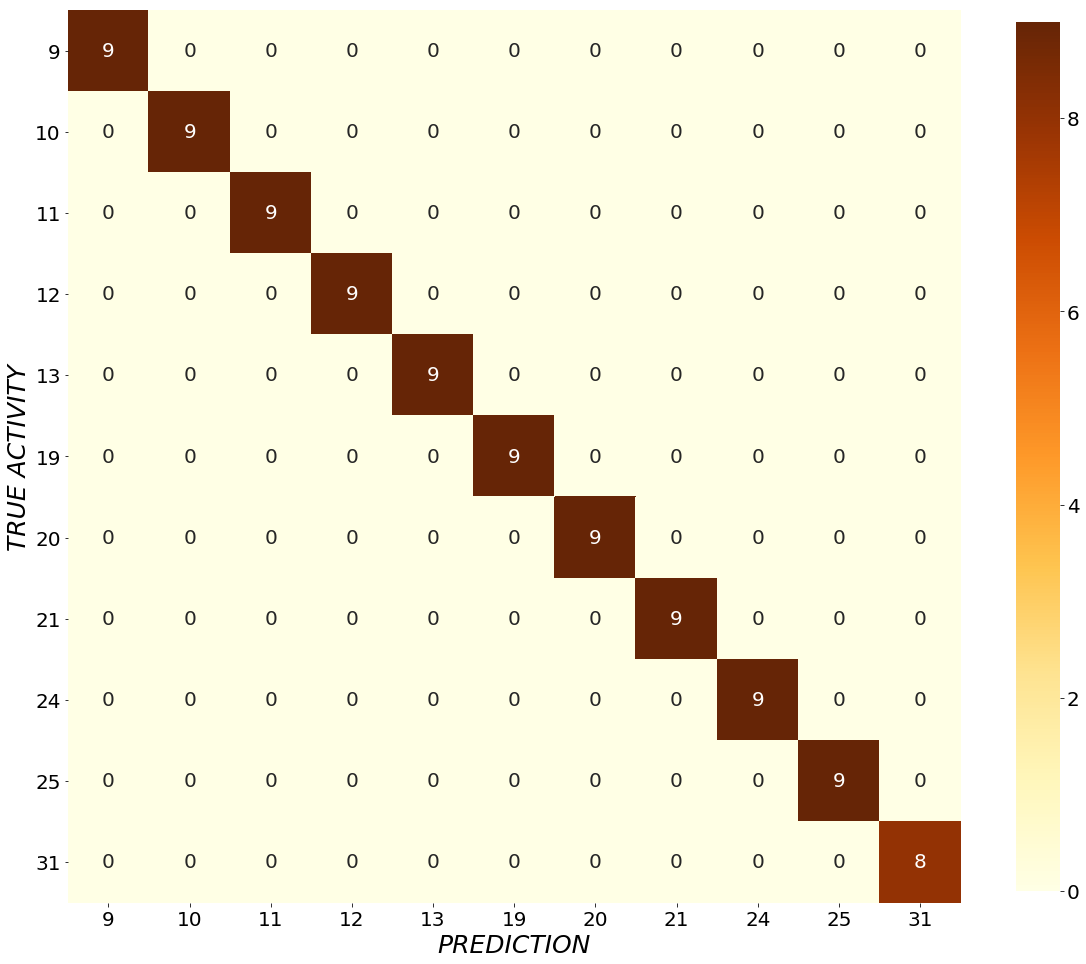



True Positive:  [9 9 9 9 9 9 9 9 9 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 0 0]
True Negative:  [89 89 89 89 89 89 89 89 89 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 0 0]


Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          1.000        98
   macro avg      1.000     1.000     1.000        98
weighted avg      1

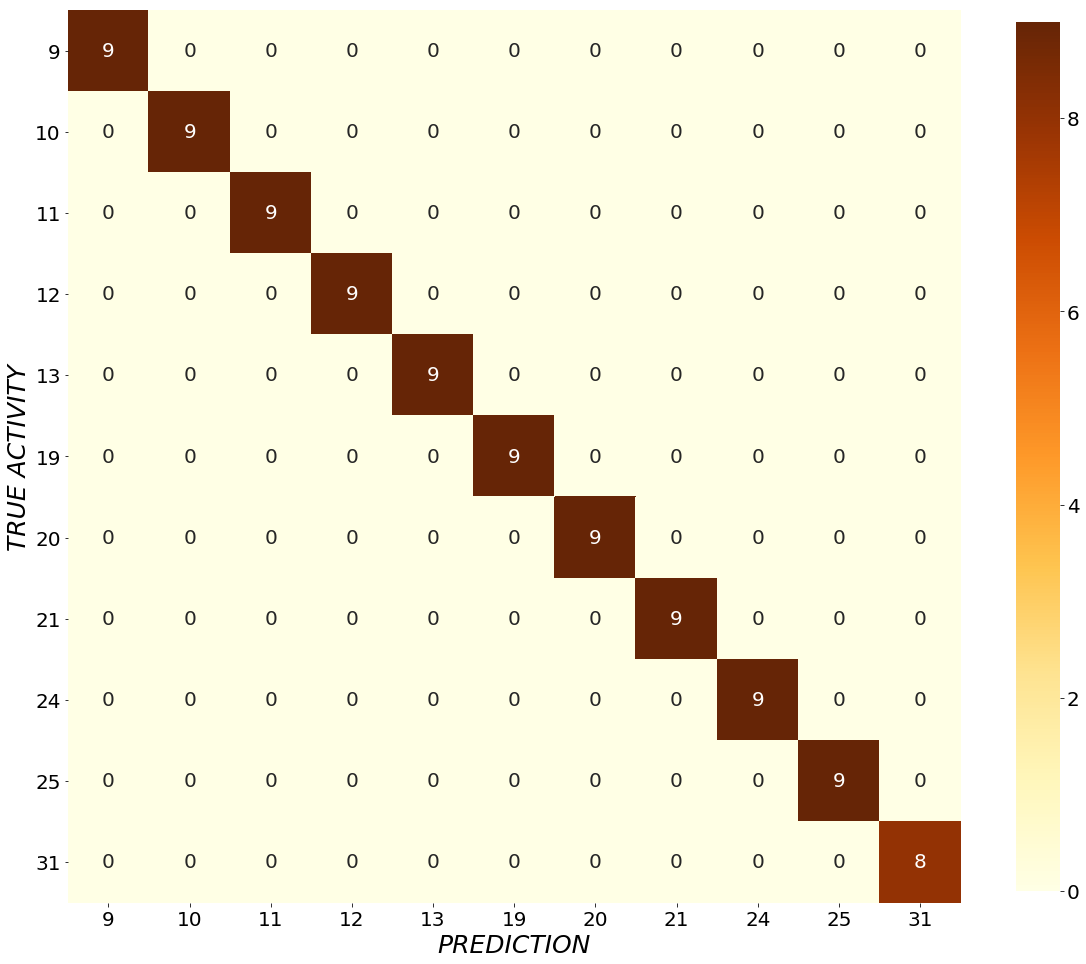



True Positive:  [9 9 9 9 9 9 9 9 9 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 0 0]
True Negative:  [89 89 89 89 89 89 89 89 89 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 0 0]


Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          1.000        98
   macro avg      1.000     1.000     1.000        98
weighted avg      1

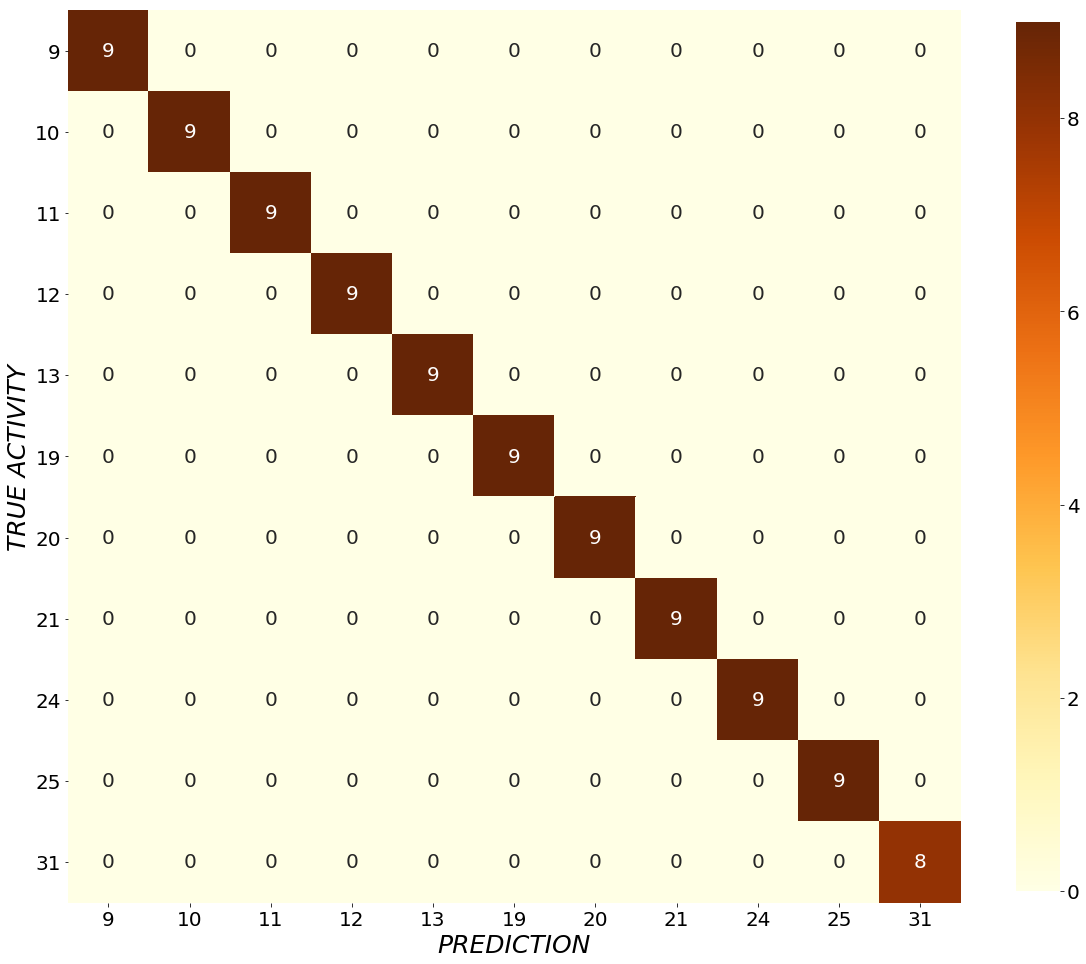



True Positive:  [9 9 9 9 9 9 9 9 9 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 0 0]
True Negative:  [89 89 89 89 89 89 89 89 89 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 0 0]


Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          1.000        98
   macro avg      1.000     1.000     1.000        98
weighted avg      1

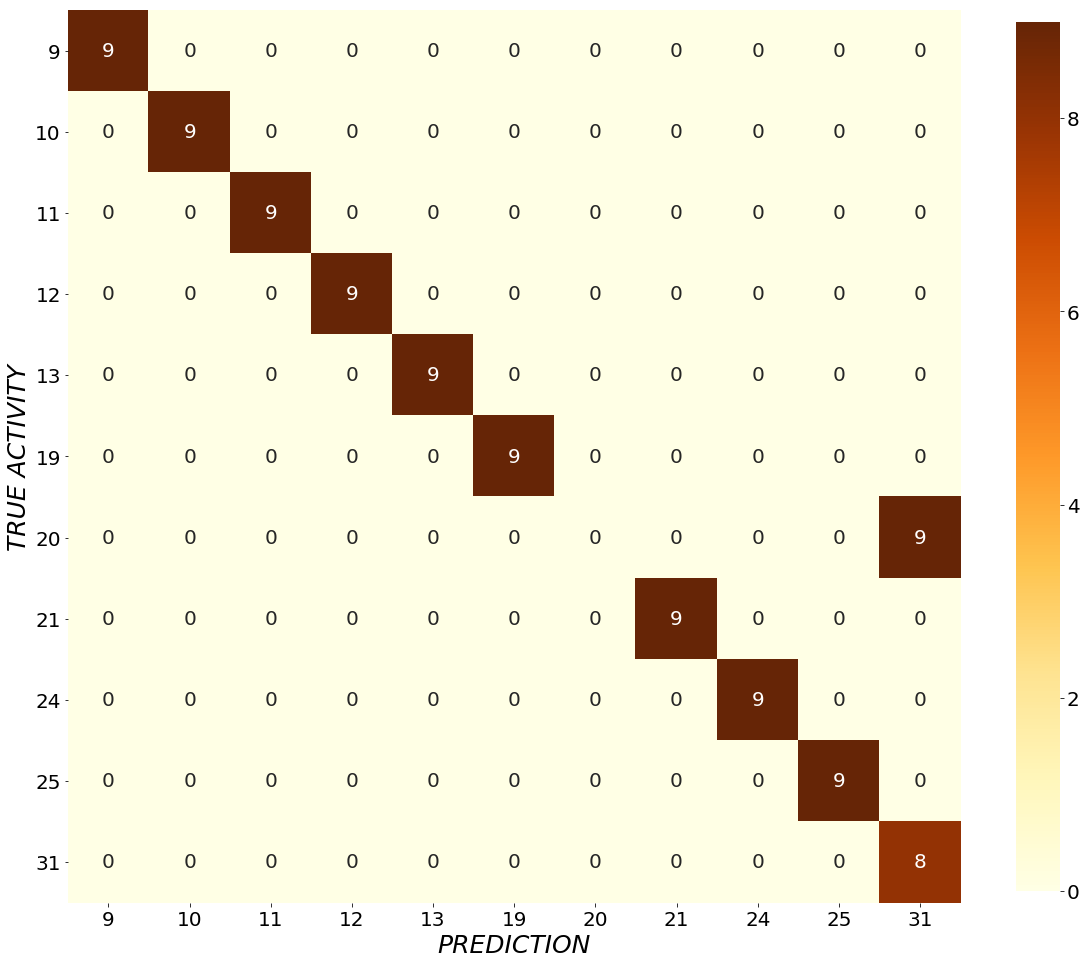



True Positive:  [9 9 9 9 9 9 0 9 9 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 0 9]
True Negative:  [89 89 89 89 89 89 89 89 89 89 81]
False Negative:  [0 0 0 0 0 0 9 0 0 0 0]


Total accuracy: 
0.9081632653061225


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      0.000     0.000     0.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      0.471     1.000     0.640         8

    accuracy                          0.908        98
   macro avg      0.861     0.909     0.876        98
weig

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




Confusion matrix:
[[9 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0 0 0]
 [0 0 9 0 0 0 0 0 0 0 0]
 [0 0 0 9 0 0 0 0 0 0 0]
 [0 0 1 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 9 0 0]
 [0 0 0 0 0 0 0 0 0 9 0]
 [0 0 0 0 0 0 0 0 0 0 8]]


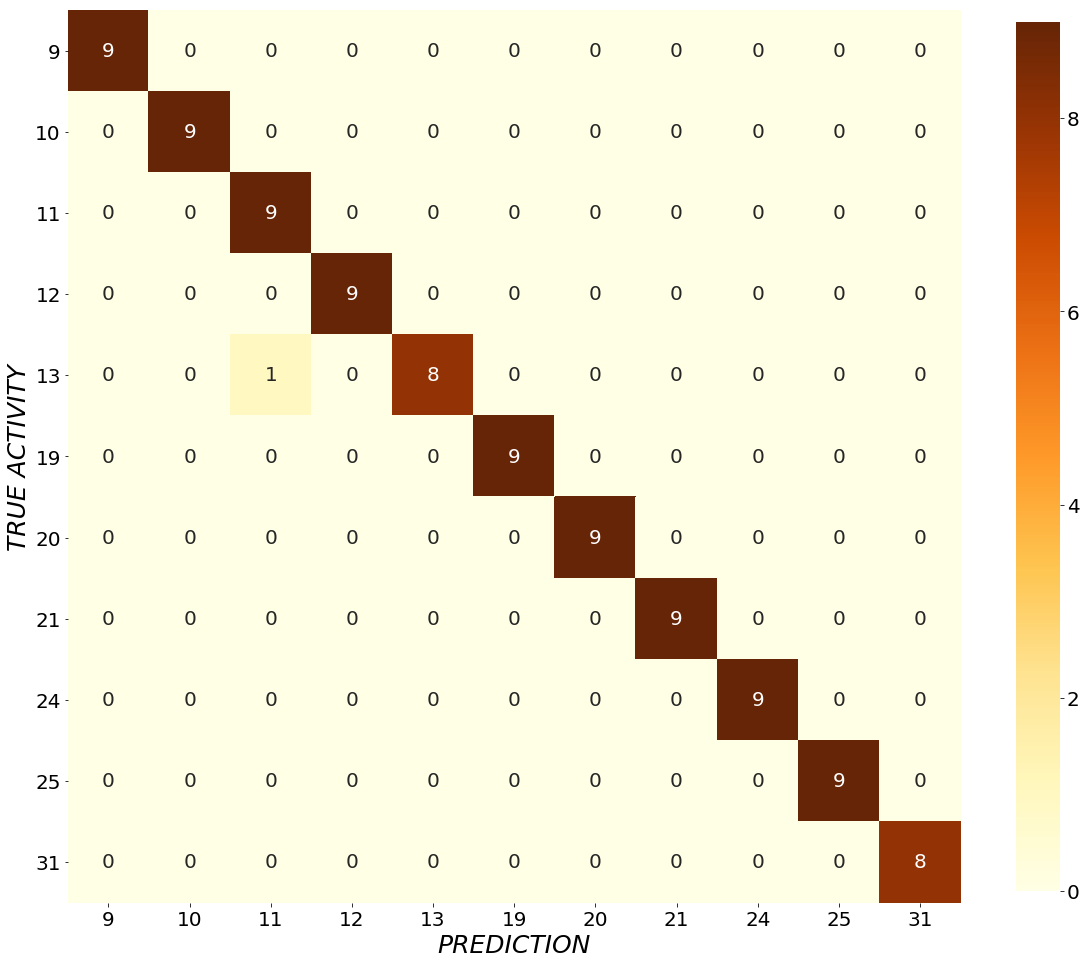



True Positive:  [9 9 9 9 8 9 9 9 9 9 8]
False Positive:  [0 0 1 0 0 0 0 0 0 0 0]
True Negative:  [89 89 88 89 89 89 89 89 89 89 90]
False Negative:  [0 0 0 0 1 0 0 0 0 0 0]


Total accuracy: 
0.9897959183673469


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      0.900     1.000     0.947         9
           3      1.000     1.000     1.000         9
           4      1.000     0.889     0.941         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          0.990        98
   macro avg      0.991     0.990     0.990        98
weig

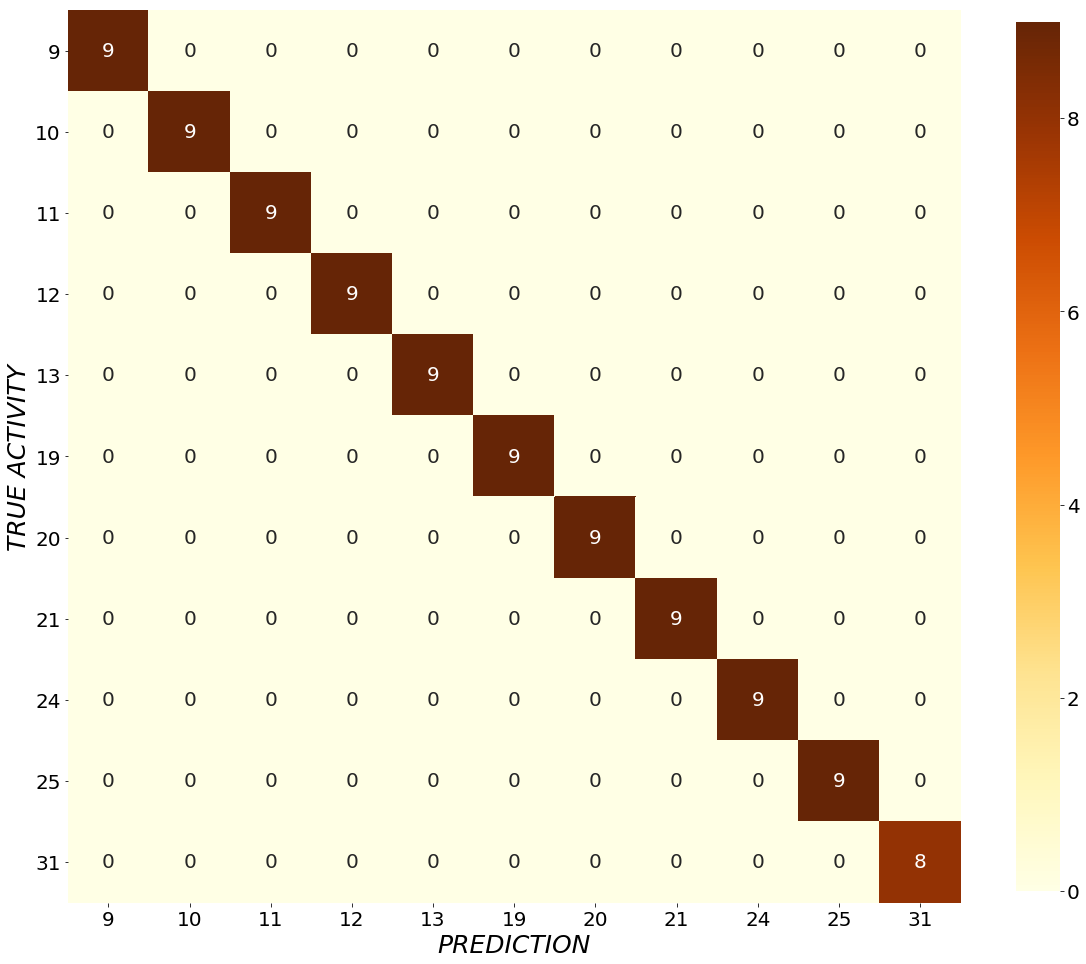



True Positive:  [9 9 9 9 9 9 9 9 9 9 8]
False Positive:  [0 0 0 0 0 0 0 0 0 0 0]
True Negative:  [89 89 89 89 89 89 89 89 89 89 90]
False Negative:  [0 0 0 0 0 0 0 0 0 0 0]


Total accuracy: 
1.0


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     1.000     1.000         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      1.000     1.000     1.000         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          1.000        98
   macro avg      1.000     1.000     1.000        98
weighted avg      1

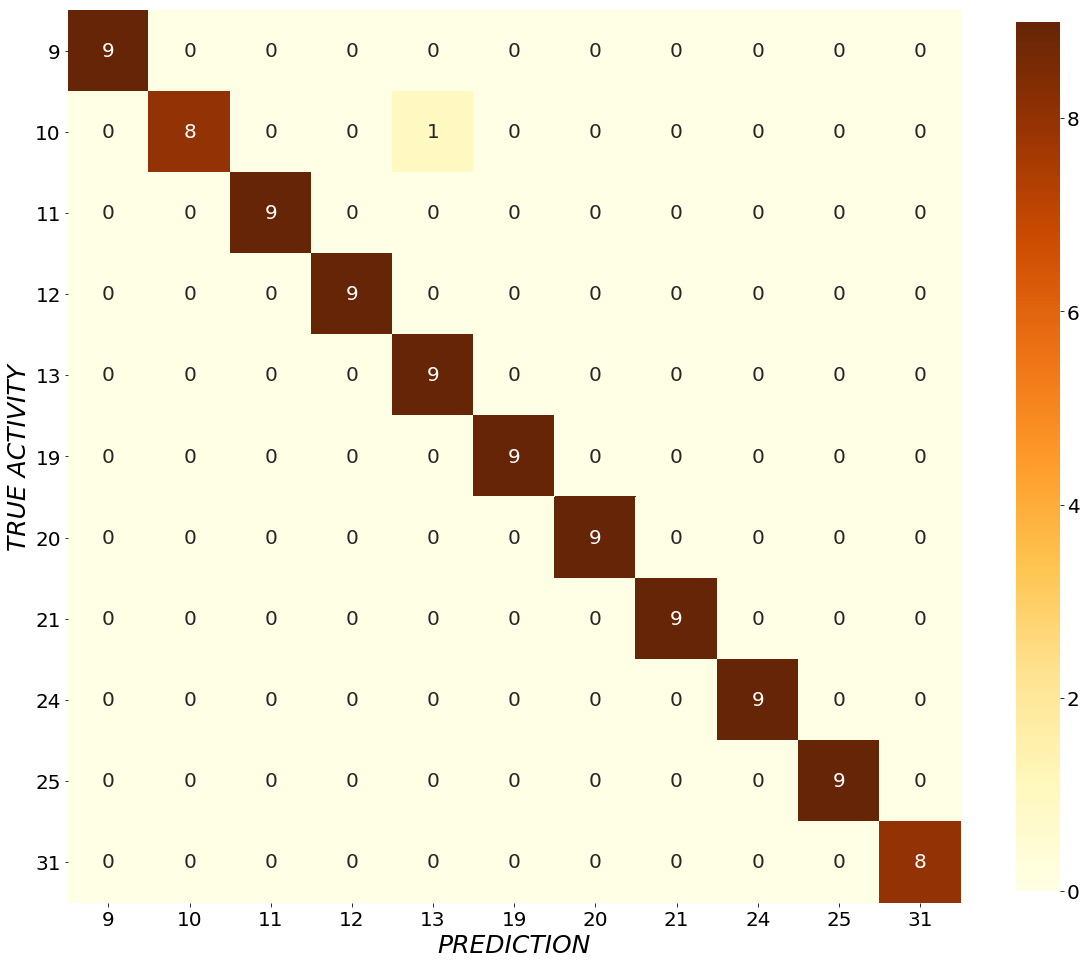



True Positive:  [9 8 9 9 9 9 9 9 9 9 8]
False Positive:  [0 0 0 0 1 0 0 0 0 0 0]
True Negative:  [89 89 89 89 88 89 89 89 89 89 90]
False Negative:  [0 1 0 0 0 0 0 0 0 0 0]


Total accuracy: 
0.9897959183673469


Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         9
           1      1.000     0.889     0.941         9
           2      1.000     1.000     1.000         9
           3      1.000     1.000     1.000         9
           4      0.900     1.000     0.947         9
           5      1.000     1.000     1.000         9
           6      1.000     1.000     1.000         9
           7      1.000     1.000     1.000         9
           8      1.000     1.000     1.000         9
           9      1.000     1.000     1.000         9
          10      1.000     1.000     1.000         8

    accuracy                          0.990        98
   macro avg      0.991     0.990     0.990        98
weig

In [9]:
accuracies = np.zeros((12))
#accuraciesClass = np.zeros((12,11))
precision = np.zeros((12,11))
recall = np.zeros((12,11))
fScore = np.zeros((12,11))
support = np.zeros((12,11))
specifities = np.zeros((12,11))

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
measure = ['precision', 'recall', 'f1-score', 'support']

for i in range(12):
    print('##################################################################################################################################')
    print('#####################################################  K-FOLD %d  #################################################################'%(i+1))
    
    subject_test = subjects[i]
    print('Test subject: ' + str(subject_test))
    
    ##  GENERACIÓN DATASET
    ts_seg = np.load('./def_raworientation/subject_'+subject_test+'_seg.npy')
    ts_lab = np.load('./def_raworientation/subject_'+subject_test+'_lab.npy')
    
    limit = 40
    ts_seg = ts_seg[:,:,:,:limit]
    ####################################################################################################################
    ## SHUFFLE DE DATOS
    np.random.seed(235)
    ts_seg = np.reshape(ts_seg[np.random.shuffle(np.arange(0,ts_seg.shape[0]))], (98,1,128,limit))
    ts_lab = np.reshape(ts_lab[np.random.shuffle(np.arange(0,ts_seg.shape[0]))], (98,11))
    
    print('Test dataset: ')
    print(ts_seg.shape, ts_lab.shape)
    ####################################################################################################################
    ## RED
    model = load_model('./02BAUGFFT_SP_KFOLD_models/CNN_RNN_'+subject_test+'.h5')
    model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=learning_rate),metrics=['categorical_accuracy'])
    ####################################################################################################################
    ## TEST
    predictions = model.predict(ts_seg, batch_size = batch_size, verbose = 0)
    
    y_pred = np.argmax(predictions,axis=-1)
    y_pred = np.expand_dims(y_pred,axis=-1)
    
    y_true = np.argmax(ts_lab,axis=-1)
    y_true = np.expand_dims(y_true,axis=-1)
    
    y_true_flat = np.ndarray.flatten(y_true)
    y_pred_flat = np.ndarray.flatten(y_pred)
    ####################################################################################################################
    ## METRICS        
    # CONFUSION MATRIX
    print('\n')
    print('Confusion matrix:')
    cm = metrics.confusion_matrix(y_true, y_pred)
    print(cm)
    plot_confusion_matrix(cm, subject_test, classes=activities)
    
    print('\n')
    tp, fp, tn, fn = perf_measure(cm)
    tp, fp, tn, fn = np.asarray(tp), np.asarray(fp), np.asarray(tn), np.asarray(fn)
    print('True Positive: ', str(tp))
    print('False Positive: ', str(fp))
    print('True Negative: ', str(tn))
    print('False Negative: ', str(fn))
    
    # ACCURACY
    print('\n')
    acc = metrics.accuracy_score(y_true_flat,y_pred_flat)
    accuracies[i] = acc
    print('Total accuracy: ')
    print(acc)

    # CLASSIFICATION REPORT
    print('\n')
    print('Classification report:')
    reportString = metrics.classification_report(y_true_flat, y_pred_flat, digits=3)
    print(reportString)
    report = metrics.classification_report(y_true_flat, y_pred_flat, digits=3, output_dict=True)
    
    for j in range(len(classes)):
        precision[i,j] = report[classes[j]][measure[0]]
        recall[i,j] = report[classes[j]][measure[1]]
        fScore[i,j] = report[classes[j]][measure[2]]
        support[i,j] = report[classes[j]][measure[3]]
    
    
    # SPECIFITY
    print('\n')
    print('Specifity: ')
    specifity = tn/(tn+fp)
    for j in range(len(activities)):
        print('%d'%(j)+'\t'+ str(specifity[j]))
        specifities[i,j] = specifity[j]
    
    fo = open('./02BAUGFFT_SP_KFOLD_models/metrics_RAW_ORIENTATION_'+subject_test+'.txt', "w")
    fo.seek(0,2)
    fo.write('Accuracy: ' + str(acc))
    fo.write('\n')
    fo.write('Confusion matrix: ')
    fo.write('\n')
    fo.write(str(cm))
    fo.write('\n')
    fo.write('Specifity:')
    fo.write(str(specifity))
    fo.write('\n')
    fo.write('Report: ')
    fo.write('\n')
    fo.write(reportString)
    fo.close()
    
    
    del subject_test, ts_seg, ts_lab, model, y_pred, y_true, predictions, y_true_flat, y_pred_flat, reportString, specifity, cm, report
    

In [10]:
print('Total accuracy: ' + str(sum(accuracies)/12))

prec = np.sum(precision,axis=0)/12
print('Precision per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(prec[j]))
print('Total precision: ' + str(sum(prec)/11))

rec = np.sum(recall,axis=0)/12
print('Recall per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(rec[j]))
print('Total recall: ' + str(sum(rec)/11))

fS = np.sum(fScore,axis=0)/12
print('F1-score per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(fS[j]))
print('Total F1-score: ' + str(sum(fS)/11))

spec = np.sum(specifities,axis=0)/12
print('Specifities per class: ')
for j in range(11):
    print('%d'%(j)+'\t'+str(spec[j]))
print('Total specifities: ' + str(sum(spec)/11))

Total accuracy: 0.9770408163265306
Precision per class: 
0	1.0
1	1.0
2	0.9916666666666667
3	0.9916666666666667
4	0.9916666666666667
5	0.9916666666666667
6	0.9166666666666666
7	1.0
8	0.9515151515151515
9	0.9666666666666667
10	0.9558823529411765
Total precision: 0.9779452276778481
Recall per class: 
0	1.0
1	0.9814814814814815
2	1.0
3	1.0
4	0.9907407407407408
5	1.0
6	0.9074074074074074
7	1.0
8	0.9444444444444445
9	0.9814814814814815
10	0.9375
Total recall: 0.9766414141414141
F1-score per class: 
0	1.0
1	0.9901960784313726
2	0.9956140350877193
3	0.9956140350877193
4	0.9907120743034056
5	0.9956140350877193
6	0.9117647058823529
7	1.0
8	0.9291666666666667
9	0.96875
10	0.92
Total F1-score: 0.9724937845951778
Specifities per class: 
0	1.0
1	1.0
2	0.9990636704119851
3	0.9990636704119851
4	0.9990636704119851
5	0.9990636704119851
6	1.0
7	1.0
8	0.9925093632958801
9	0.9943820224719101
10	0.9916666666666667
Total specifities: 0.9977102485529453
